In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1. 几何图形绘制

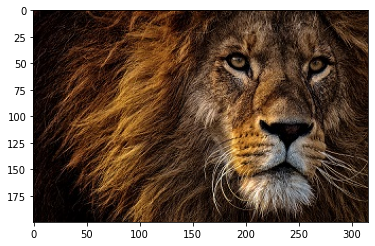

In [3]:
img = cv.imread('pic/lion200x316.jpg')
img2 = img.copy()

show(img)

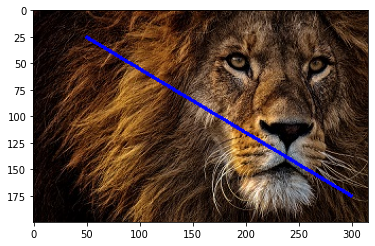

In [4]:
## 直线
cv.line(img, (50, 25), (300, 175), (255, 0, 0), 2)
show(img)

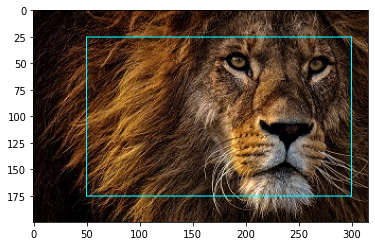

In [5]:
## 矩形
img = img2.copy()

cv.rectangle(img, (50, 25), (300, 175), (255, 255, 0)) # 左上角，右下角
show(img)

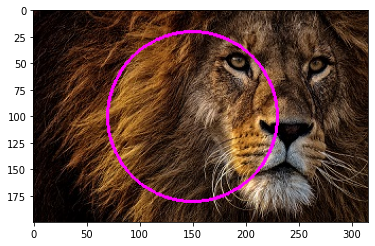

In [7]:
## 圆
img = img2.copy()

cv.circle(img, (150, 100), 80, (255, 0, 255), 2)
show(img)

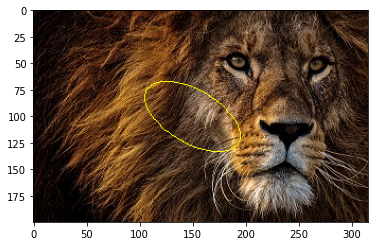

In [8]:
## 椭圆
img = img2.copy()

box = ((150, 100), (100, 50), 30)
cv.ellipse(img, box, (0, 255, 255))
show(img)

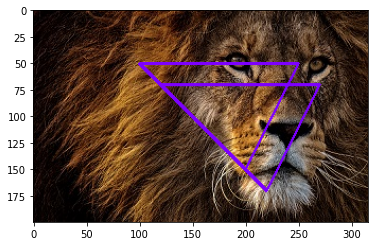

In [11]:
## 多边形
img = img2.copy()

pts = np.array([
    [[100, 50]],
    [[250, 50]],
    [[200, 150]]
])
cv.polylines(img, [pts, pts+20], True, (255, 0, 125), 2)
show(img)

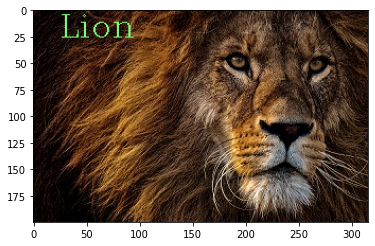

In [12]:
## 文字
img = img2.copy()

cv.putText(img, "Lion", (25,25), cv.FONT_HERSHEY_COMPLEX, 1.0, (125, 255, 125))
show(img)

## 2. 轮廓绘制

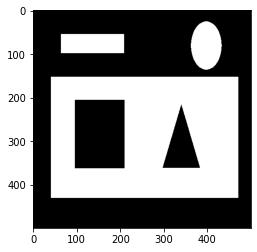

In [22]:
img = cv.imread('pic/contour_bin.png', -1)
show(img)

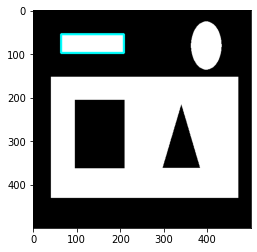

In [35]:
contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

bgr = cv.merge([img, img, img])
cv.drawContours(bgr, contours, 1, (255, 255, 0), 3)
show(bgr)

In [30]:
contours[2].shape

(1412, 1, 2)

In [36]:
contours, hierarchy = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

contours[2].shape

(4, 1, 2)

## 3. 轮廓提取方式

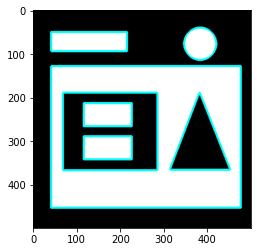

In [110]:
img = cv.imread('pic/contours2_bin.png', -1)

contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

bgr = cv.merge([img, img, img])
cv.drawContours(bgr, contours, -1, (255, 255, 0), 3)
show(bgr)

In [111]:
hierarchy

array([[[ 5, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1,  3,  0],
        [ 4, -1, -1,  2],
        [-1,  3, -1,  2],
        [ 6,  0, -1, -1],
        [-1,  5, -1, -1]]], dtype=int32)

## 4. 实例：选择金鱼

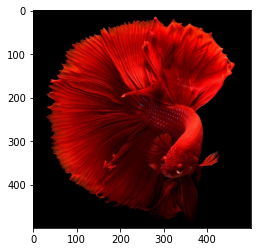

In [29]:
img = cv.imread('pic/goldfish500x500.jpg')

show(img)

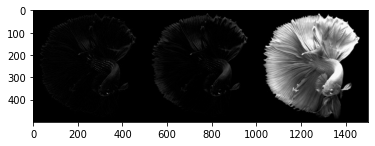

In [31]:
b, g, r = cv.split(img)

show(np.hstack([b, g, r]))

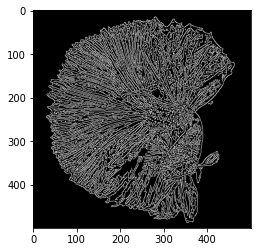

In [32]:
edge1 = cv.Canny(r, 5, 50)

show(edge1)

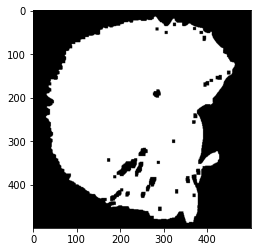

In [34]:
K = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
edge2 = cv.morphologyEx(edge1, cv.MORPH_CLOSE, K, iterations=3)

show(edge2)

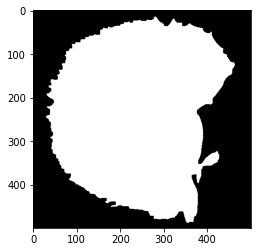

In [37]:
cnts, hiers = cv.findContours(edge2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

mask = np.zeros((500, 500), np.uint8)
cv.drawContours(mask, cnts, 0, 255, -1)

show(mask)

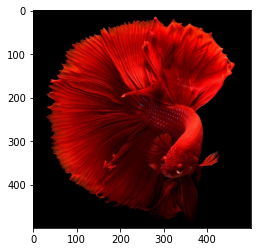

In [38]:
goldfish = np.zeros((500, 500, 4), np.uint8)

goldfish[:, :, :3] = img
goldfish[:, :, 3] = mask

show(goldfish)

In [39]:
cv.imwrite('test/goldfish.png', goldfish)

True